The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species

We choose this dataset to learn about all model we have learnt in this course

The point is : how MC can classified new Iris with input infos

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
data = pd.read_csv("./Iris.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
# Let's defines X and y for train_test_split 
# y should be values of the column 'label' and X should contain the rest (784 pixel columns)
# Your code here
# X = data.drop(columns="label")
X = data.drop("Species",axis=1)
y = data['Species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Classified Problem

In [29]:
# Random Forest & Decision Tree
# Let's define two classifier called rfc and dtc represent RandomForestClassifier and DecisionTreeClassifier
# Your code here
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=101)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [30]:
# Let's fit training data to Random Forest Classifier
# Your code here
rfc.fit(X_train,y_train)

C:\Users\Schaefer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [33]:
# Let's fit training data to Decision Tree Classifier
# Your code here
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [34]:
#train model with logistic regression
lr.fit(X_train,y_train)

C:\Users\Schaefer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Schaefer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
rfc_predict = rfc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,rfc_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        12

      micro avg       1.00      1.00      1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [35]:
# Decision Tree model
# Your code here
dtc_predict = dtc.predict(X_test)
print(classification_report(y_test,dtc_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        12

      micro avg       1.00      1.00      1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [41]:
lr_predict = lr.predict(X_test)
print(classification_report(y_test,lr_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.65      0.79        20
 Iris-virginica       0.63      1.00      0.77        12

      micro avg       0.84      0.84      0.84        45
      macro avg       0.88      0.88      0.85        45
   weighted avg       0.90      0.84      0.85        45



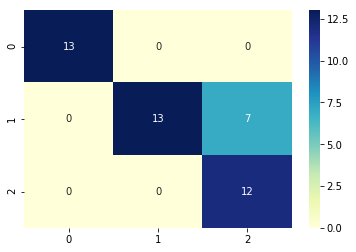

In [42]:
lr_cm = confusion_matrix(y_test,lr_predict)

sns.heatmap(lr_cm ,cmap="YlGnBu", annot=True, fmt="d")

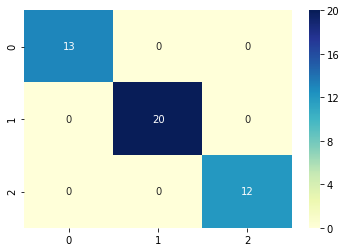

In [26]:
# Let's plot the heatmap for confusion matrix of Random Forest model
# Your code here
rfc_cm = confusion_matrix(y_test,rfc_predict)

sns.heatmap(rfc_cm ,cmap="YlGnBu", annot=True, fmt="d")

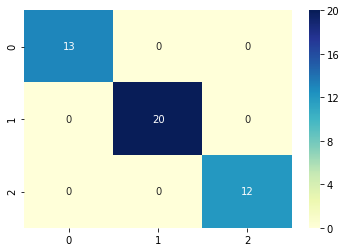

In [27]:
# And heatmap for confusion matrix of Decision Tree model
# Your code here

dtc_cm = confusion_matrix(y_test,dtc_predict)

sns.heatmap(dtc_cm ,cmap="YlGnBu", annot=True, fmt="d")

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


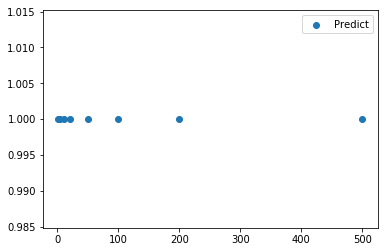

In [28]:
n = [1 ,5 ,10, 20, 50, 100, 200, 500]
# Define a 'result' array to save the accuracy score of each trial
result = []
# Using a for-loop which goes through n
# Inside the loop we will define a new RandomForestClassifier model with appropriate 'n_estimators'
# Then apply that model on X_test and calculate the accuracy score then save it into 'result'
# Your code here
for i in n:
    clf = RandomForestClassifier(n_estimators=i, random_state=101)
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    result.append(accuracy_score(y_test,predictions))    
# Last step let's plot n and result on a grid using plt.scatter()
plt.scatter(x=n,y=result,label="Predict" )
plt.xlabel = "Estimator"
plt.ylabel= "Accuracy"
plt.legend();
print(result)

### Regression problem


In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [79]:
def convertSpeciestoInt(input):
    if str(input) == "Iris-setosa":
        return 0
    elif  str(input) == ("Iris-versicolor"):
        return 1
    else:
        return 2

dataframe = pd.DataFrame(data)
dataframe["Type"] = dataframe["Species"].apply(convertSpeciestoInt)
#dataframe["Species"].unique()
dataframe.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,type,Type
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,0


In [80]:
X = dataframe.drop("Species",axis=1)
y = dataframe['Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm.fit(X=X_train,y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
lm_predict= lm.predict(X=X_test)

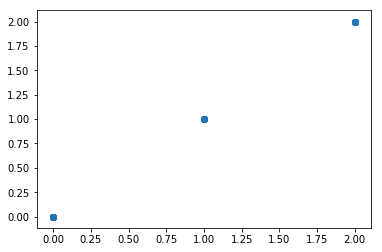

In [85]:
import matplotlib.pyplot as plt
plt.scatter(y_test,lm_predict)

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print("MAE: " + str(mean_absolute_error(y_test,lm_predict)))
print("MSE: " + str(mean_squared_error(y_test,lm_predict)))
print("RMSE: " + str(rmse(lm_predict,y_test)))

MAE: 1.873203201612015e-14
MSE: 4.860646793227976e-28
RMSE: 2.2046874593075492e-14
